## Vector Learning
This notebook will be used to record investigations on vector learning.

The first step is to visually see how the traces look like in current and charge spaces.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import glob
files = glob.glob("/Users/sandesh/data/quantum-ml/single_dot/*full_map*")
print(files)

['/Users/sandesh/data/quantum-ml/single_dot/full_map20171115-014850.npy', '/Users/sandesh/data/quantum-ml/single_dot/full_map20171115-031743.npy', '/Users/sandesh/data/quantum-ml/single_dot/full_map20171115-033822.npy', '/Users/sandesh/data/quantum-ml/single_dot/full_map20171115-035951.npy', '/Users/sandesh/data/quantum-ml/single_dot/full_map20171115-042108.npy', '/Users/sandesh/data/quantum-ml/single_dot/full_map20171115-044158.npy', '/Users/sandesh/data/quantum-ml/single_dot/full_map20171115-101701.npy', '/Users/sandesh/data/quantum-ml/single_dot/full_map20171115-112744.npy', '/Users/sandesh/data/quantum-ml/single_dot/full_map20171115-130954.npy']


In [7]:
def load_full_map(file):
    res = np.load(file).item()
    V_B1= np.array(res['V_B1_vec'])
    V_P= np.array(res['V_P_vec'])
    V_B2= np.array(res['V_B2_vec'])
    XX,YY = np.meshgrid(V_B1,V_B2)
    N_v = len(V_P)
    current_vec = []
    charge_vec = []
    state_vec = []
    sensor_vec = []
    for ele in res['output']:
        current_vec.append(ele['current'])
        charge_vec.append(np.sum(ele['charge']))
        state_vec.append(ele['state'])
        sensor_vec.append(ele['sensor'])

    current_vec = np.array(current_vec).reshape(N_v,N_v,N_v)
    charge_vec = np.array(charge_vec).reshape(N_v,N_v,N_v)
    state_vec = np.array(state_vec).reshape(N_v,N_v,N_v)
    sensor_vec = np.array(sensor_vec).reshape(N_v,N_v,N_v,-1)
    return XX,YY,current_vec,charge_vec,state_vec,sensor_vec

In [8]:
XX,YY,current_vec,charge_vec,state_vec,sensor_vec = load_full_map(files[-1])

# Plot of the Differential Conductance

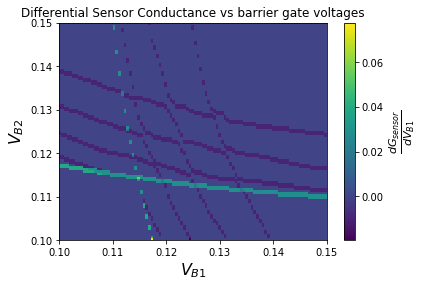

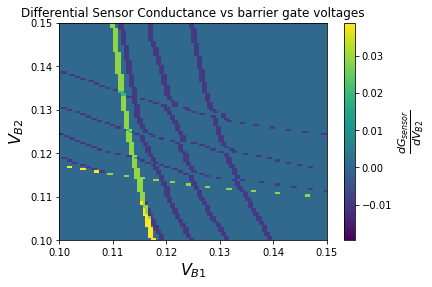

In [29]:
grad = np.gradient(sensor_vec[:,99,:,0])
plt.figure(1)
plt.pcolor(XX,YY,grad[0])
plt.xlabel(r"$V_{B1}$",fontsize=16)
plt.ylabel(r"$V_{B2}$",fontsize=16)
cbar1 = plt.colorbar()
cbar1.set_label(r"$\frac{dG_{sensor}}{dV_{B1}}$",fontsize=16)
plt.title("Differential Sensor Conductance vs barrier gate voltages")

plt.figure(2)
plt.pcolor(XX,YY,grad[1])
plt.xlabel(r"$V_{B1}$",fontsize=16)
plt.ylabel(r"$V_{B2}$",fontsize=16)
cbar2 = plt.colorbar()
plt.title(r"Differential Sensor Conductance vs barrier gate voltages")
cbar2.set_label(r"$\frac{dG_{sensor}}{dV_{B2}}$",fontsize=16)

In [81]:
import itertools
import scipy.interpolate
def tracer(image,loc):
    vec_x = range(image.shape[0])
    vec_y = range(image.shape[1])
    grid = np.array(list(itertools.product(vec_x,vec_y)))
    values = image.flatten()
    
    loc_x = range(loc[0]-10,loc[0] + 10)
    loc_y = range(loc[1]-10,loc[1] + 10)
    trace_x = scipy.interpolate.griddata(grid, values, (loc_x,loc[1]))
    trace_y = scipy.interpolate.griddata(grid, values, (loc[0],loc_y))
    trace = np.concatenate((trace_x,trace_y))
    return trace
    

In [82]:
trace = tracer(grad[0],[50,50])

In [118]:
trace_list = []
n_trace = 100
loc_list = zip(np.random.randint(40,60,n_trace),np.random.randint(40,60,n_trace))
for loc in loc_list:
    trace_list.append(tracer(grad[0],loc))
    

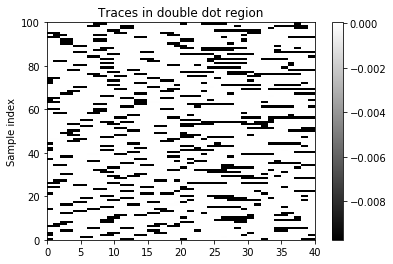

In [119]:
plt.pcolor(np.array(trace_list),cmap=plt.cm.gray)
plt.colorbar()
plt.title("Traces in double dot region")
plt.ylabel("Sample index")

In [125]:
trace_list_sd = []
n_trace = 100
loc_list = zip(np.random.randint(40,60,n_trace),np.random.randint(11,30,n_trace))
for loc in loc_list:
    trace_list_sd.append(tracer(grad[0],loc))

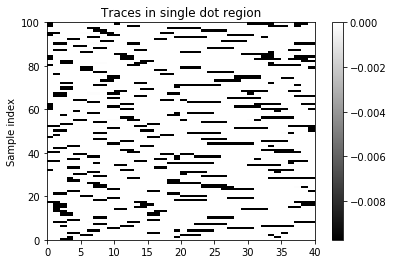

In [126]:
plt.pcolor(np.array(trace_list_sd),cmap=plt.cm.gray,vmax=0)
plt.colorbar()
plt.title("Traces in single dot region")
plt.ylabel("Sample index")

In [122]:
trace_list_bar = []
n_trace = 100
loc_list = zip(np.random.randint(60,80,n_trace),np.random.randint(60,80,n_trace))
for loc in loc_list:
    trace_list_bar.append(tracer(grad[0],loc))

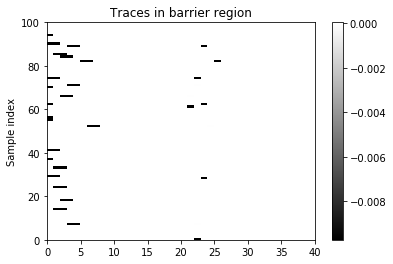

In [123]:
plt.pcolor(np.array(trace_list_bar),cmap=plt.cm.gray)
plt.colorbar()
plt.title("Traces in barrier region")
plt.ylabel("Sample index")